In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("quick_run.csv", encoding="utf-8", sep="\t", header=None)

In [3]:
for i in range(len(data[0])):
    data[0][i] = data[0][i].strip(",")

In [4]:
label = []
comment = []
for i in range(len(data[0])):
    label.append(data[0][i].split("\t")[1])
    comment.append(data[0][i].split("\t")[2])

In [5]:
input_dataset = np.column_stack([label,comment])
np.random.shuffle(input_dataset)

In [6]:
X,y = input_dataset[:, 1], input_dataset[:, 0]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
train= np.column_stack((X_train,y_train))
test = np.column_stack((X_test, y_test))

In [9]:
train.shape

(1296, 2)

In [65]:
test.shape

(324, 2)

In [10]:
id = 0
with open("train.csv", "w", encoding="utf-8") as g:
    for x, y in train:
        
        g.write(str(id) + "\t" + str(y).lower() +"\t" + str(x) + "\n")
        id += 1

In [11]:
id = 0
with open("test.csv", "w", encoding="utf-8") as g:
    for x, y in test:
        g.write(str(id) + "\t" + str(y).lower() +"\t" + str(x) + "\n")
        id += 1

In [12]:
train_data = pd.DataFrame(columns=["label", "comment"])

In [13]:
train_data["label"] = train[:, 1]
train_data["comment"] = train[:, 0]

In [14]:
sentiment_train = train_data["label"].value_counts()

In [15]:
sentiment_train

fairly satisfied                      675
very satisfied                        220
neither satisfied nor dissatisfied    214
fairly dissatisfied                   123
very dissatisfied                      64
Name: label, dtype: int64

In [16]:
test_data = pd.DataFrame(columns=["label", "comment"])

In [17]:
test_data["label"] = test[:, 1]
test_data["comment"] = test[:, 0]

In [18]:
sentiment_test = test_data["label"].value_counts()

In [19]:
sentiment_test

fairly satisfied                      179
neither satisfied nor dissatisfied     54
very satisfied                         39
fairly dissatisfied                    36
very dissatisfied                      16
Name: label, dtype: int64

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
train_df = pd.DataFrame({"Sentiment_level": sentiment_train.index, "Number": sentiment_train.values})

In [46]:
test_df = pd.DataFrame({"Sentiment_level": sentiment_test.index, "Number": sentiment_test.values})

Text(0.5, 0, 'Sentiment_level')

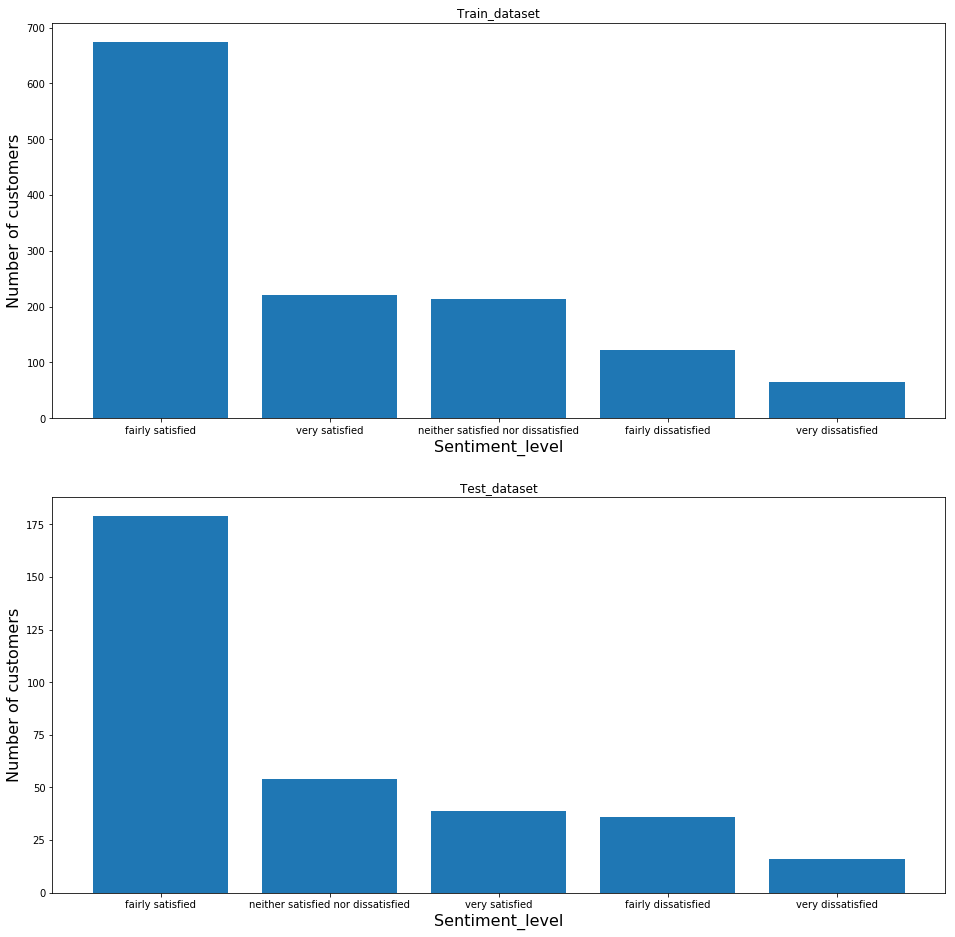

In [64]:
fig, ax = plt.subplots(2, 1, figsize=(16, 16))
ax[0].bar(train_df["Sentiment_level"], train_df["Number"])
ax[0].set_title("Train_dataset")
ax[0].set_xlabel("Sentiment_level", fontsize=16)
ax[0].set_ylabel("Number of customers", fontsize=16)
ax[1].bar(test_df["Sentiment_level"], test_df["Number"])
ax[1].set_title("Test_dataset")
ax[1].set_ylabel("Number of customers", fontsize=16)
ax[1].set_xlabel("Sentiment_level", fontsize=16)

16